<a href="https://colab.research.google.com/github/guifzy/Banco-C/blob/main/Oficina_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Intro

- O que é ciência de dados?
- Suas espectativas para este mini curso?


- Avaliação e apresentação do projeto
- DataFrame **Sentment140**
  -  Qual é o sentimento predominante (positivo ou negativo)?
  -  Como o sentimento varia ao longo do tempo?


# Sentment140

[Link para Download do DataSet.](https://www.kaggle.com/datasets/kazanova/sentiment140)

**Colunas:**
- *target:* A polaridade do tweet (0 = negativo, 4 = positivo);

- *ids:* Representa o id do tweet;

- *date:* A data em que tweet foi feito(Sat May 16 23:58:44 UTC 2009)

- *flag:* The query (lyx). If there is no query, then this value is NO_QUERY.

- *user:* Nome do usuario que tweetou (robotickilldozr)

- *text:* Conteudo do tweet (Lyx is cool)

Quais destas informações são relevantes?
- Data
- Polaridade dos tweeets
- Conteudo

# Pre-processamento

In [ ]:
import pandas as pd
import numpy as np

# Carregar o dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/DataFrames/training.1600000.processed.noemoticon.csv'  # Substitua pelo caminho do arquivo CSV
df = pd.read_csv(dataset_path, encoding='latin-1')

# Explorar o dataset
print("Dimensões do dataset:", df.shape)
print("Primeiras linhas do dataset:")
df.head()


Dimensões do dataset: (1599999, 6)
Primeiras linhas do dataset:


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Renomear as colunas para facilitar a manipulação
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

print("Colunas do dataset:", df.columns)

Colunas do dataset: Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')


In [ ]:
print("Ultimas linhas do DataSet")
df.tail()

Ultimas linhas do DataSet


,target,id,date,flag,user,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
# Mostra os valores descritivos
df.describe()

,target,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
# Informações gerais sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# Verificar valores ausentes
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
df['target'].value_counts()

,count
target,
4,800000
0,799999


# Introdução ao Pré-Processamento

- Por que tratar os seus dados?
- Quais problemas um DataFrame com dados indevidos pode gerar?
- Príncipais etapas do pré-processamento

## Remoção de caracteres indevidos

Explicação da biblioteca Re: É usada para trabalhar com expressões regulares, que são sequências de caracteres que formam um padrão de pesquisa. Elas são extremamente poderosas para manipulação de strings, como busca, substituição e extração de padrões em textos.

Comandos usados:


```
re.sub
```

Substitui um conjunto de dados de uma string por outro.


```
text = re.sub(r'@\w+', '', text) substitui @\w+ por espaço em branco
```

Metacaracteres: Símbolos com significados especiais.
- [ ]: Definindo um conjunto de caracteres. Ex: [abc] corresponde a a, b ou c.
- ^: Início da string.

Sequências de Escape:
- \w: Qualquer caractere alfanumérico [a-zA-Z0-9_].
- \s: Qualquer espaço em branco.


In [ ]:
%%time
# biblioteca para remapear texto
import re

# Função para remover URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Função para remover menções, hashtags, emojis e caracteres especiais
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove menções
    text = re.sub(r'#', '', text)     # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'[^\w\s]', '', text)  # Remove caracteres especiais
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove emojis
    return text

# Aplicar as funções de limpeza
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(clean_text)

# Tratar valores ausentes (se houver)
df.dropna(subset=['text'], inplace=True)

CPU times: user 15.8 s, sys: 465 ms, total: 16.3 s
Wall time: 16.7 s


## Revisão dos dados

In [ ]:
print("Dataset após limpeza:")
df.head()

Dataset após limpeza:


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sa...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i he...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew


## Tokenizar o texto e remover stop words

Explicação NLTK: É uma biblioteca usada para tratamento de texto para modelagem de dados.

Tokenização:
- É o processo de dividir um texto em unidades menores, como palavras ou frases.


```
tokens = word_tokenize(text.lower())
```



Stopwords:
- São palavras comuns (como "a", "e", "o", "em") que geralmente são removidas de um texto durante o processamento, pois não carregam muito significado semântico.


```
stop_words = set(stopwords.words('english'))
```


```
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
```




In [ ]:
%%time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir as stop words em inglês
stop_words = set(stopwords.words('english'))

# Função para tokenizar e remover stop words
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenizar e converter para minúsculas
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Remover stop words e manter apenas palavras alfanuméricas
    return " ".join(filtered_tokens)

# Aplicar a função de preprocessamento
df['clean_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CPU times: user 3min 34s, sys: 1.58 s, total: 3min 36s
Wall time: 4min 2s


## Revisão final dos dados

In [ ]:
print("Dataset após tokenização e remoção de stop words:")
df.head()

Dataset após tokenização e remoção de stop words:


,target,id,date,flag,user,text,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sa...,dived many times ball managed save 50 rest go ...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i he...,behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,whole crew


# Visualização dos Dados

- Príncipais gráficos do MatPlot e Seaborn:

- Análises pertinentes dos gráficos abaixo:
  - Gráfico de barra
  - Histograma
  - Gráfico de Linha
  - Nuvem de palavras

Gráficos suportados pelo Seaborn e MatPlot:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico de Barras: Distribuição de Sentimentos

Verificação no balanceamento de dados

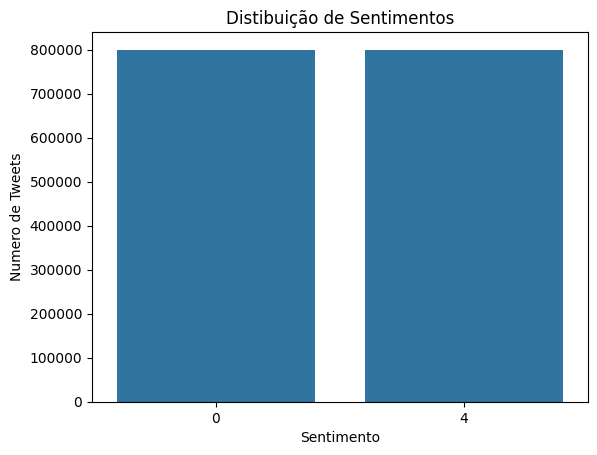

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Distibuição de Sentimentos")
plt.xlabel('Sentimento')
plt.ylabel("Numero de Tweets")
plt.show()

## Histograma

Este histograma mostra como o comprimento dos tweets (número de palavras) varia com o sentimento.

In [ ]:
df['tweet_length'] = df['clean_text'].apply(len)

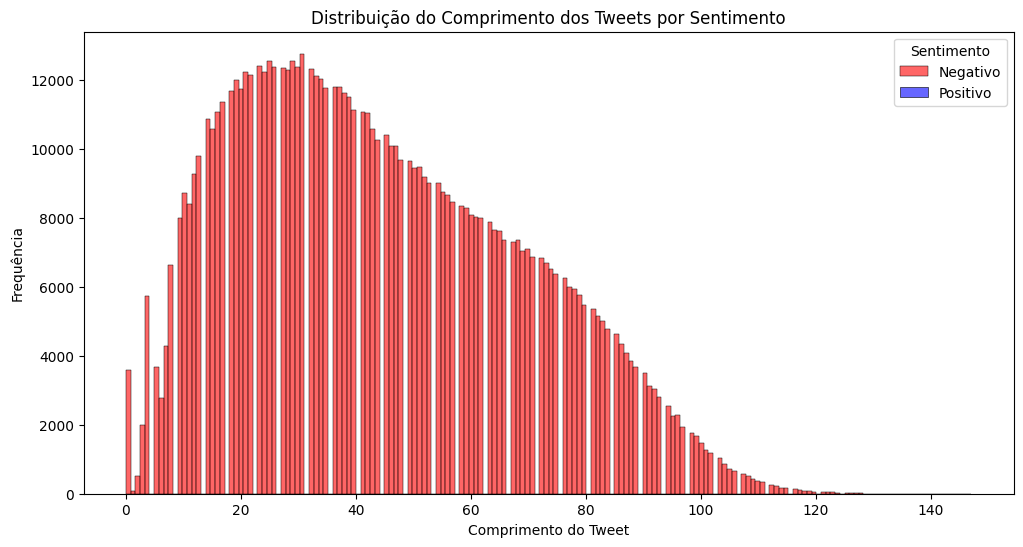

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['target'] == 0], x='tweet_length', color='red', label='Negativo', alpha=0.6)
sns.histplot(data=df[df['target'] == 1], x='tweet_length', color='blue', label='Positivo', alpha=0.6)
plt.title('Distribuição do Comprimento dos Tweets por Sentimento')
plt.xlabel('Comprimento do Tweet')
plt.ylabel('Frequência')
plt.legend(title='Sentimento')
plt.show()

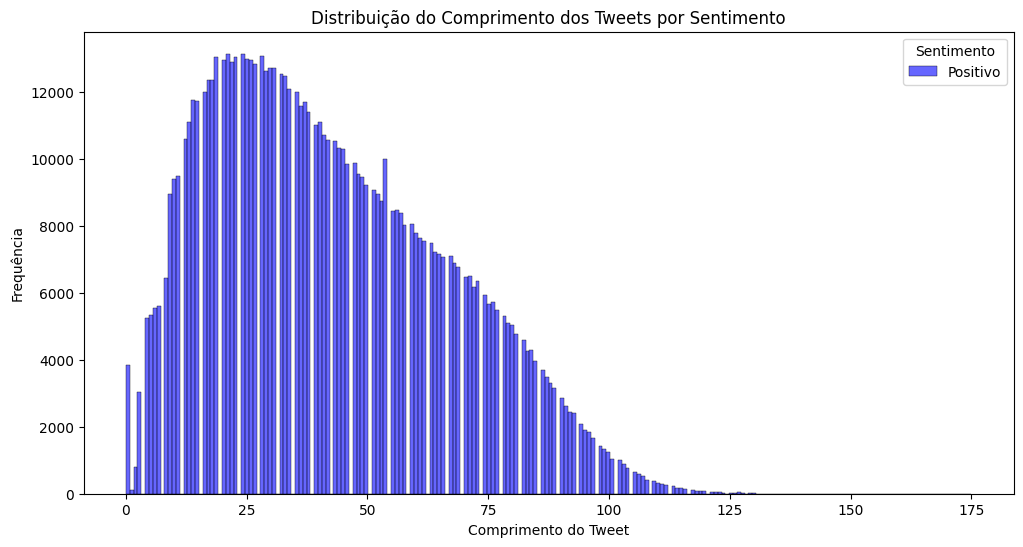

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['target'] == 4], x='tweet_length', color='blue', label='Positivo', alpha=0.6)
plt.title('Distribuição do Comprimento dos Tweets por Sentimento')
plt.xlabel('Comprimento do Tweet')
plt.ylabel('Frequência')
plt.legend(title='Sentimento')
plt.show()


In [ ]:
print(df[df['target'] == 0]['tweet_length'].describe())

count    799999.000000
mean         44.306152
std          24.631291
min           0.000000
25%          24.000000
50%          41.000000
75%          62.000000
max         147.000000
Name: tweet_length, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tweet_length, dtype: float64


In [ ]:
print(df[df['target'] == 4]['tweet_length'].describe())

count    800000.000000
mean         42.412349
std          24.361534
min           0.000000
25%          23.000000
50%          39.000000
75%          60.000000
max         175.000000
Name: tweet_length, dtype: float64


## Gráfico de Linha

Mostra a evolução do número de tweets por sentimento ao longo do tempo.

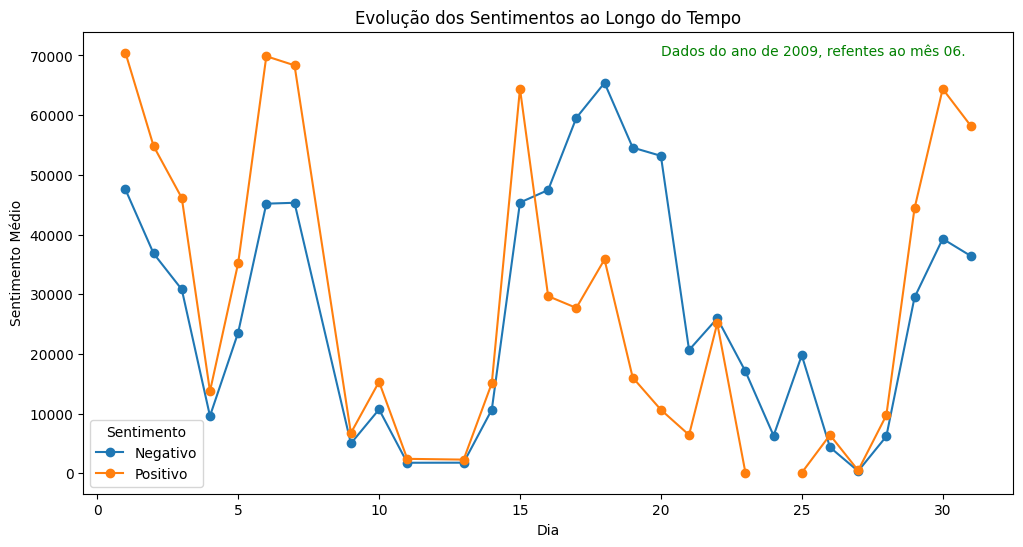

In [ ]:
# lembrar de criar uma coluna so com o dia do tweet e colocar uma legenda com o anoe o mes
df['date'] = pd.to_datetime(df['date']) # coverte para padrão de data
filtro = df['date'].dt.day # filtro para selecionar apenas os dias

sentiment_over_time = df.groupby([filtro, 'target']).size().unstack() # faço um grupo com a quantidade de tweets
                                                                      # positivos e negativos em cada dia

# Plotar o gráfico de linha
sentiment_over_time.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Evolução dos Sentimentos ao Longo do Tempo')
plt.xlabel('Dia')
plt.ylabel('Sentimento Médio')
plt.text(20, 70000, "Dados do ano de 2009, refentes ao mês 06.", fontsize=10, color='green')
plt.legend(title='Sentimento', labels=['Negativo', 'Positivo'])
plt.show()

## Nuvem de Palavras

Serão criadas duas nuvens de palavras: uma para tweets positivos e outra para negativos.

In [ ]:
from wordcloud import WordCloud

# Para tweets positivos
positive_words = ' '.join(df[df['target'] == 4]['clean_text']) # cria uma string com os textos categorizados como positivos
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words) # aplica a biblioteca

# Para tweets negativos
negative_words = ' '.join(df[df['target'] == 0]['clean_text']) # cria uma string com os textos categorizados como negativos
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_words) # aplica a biblioteca

### Nuvem Positiva

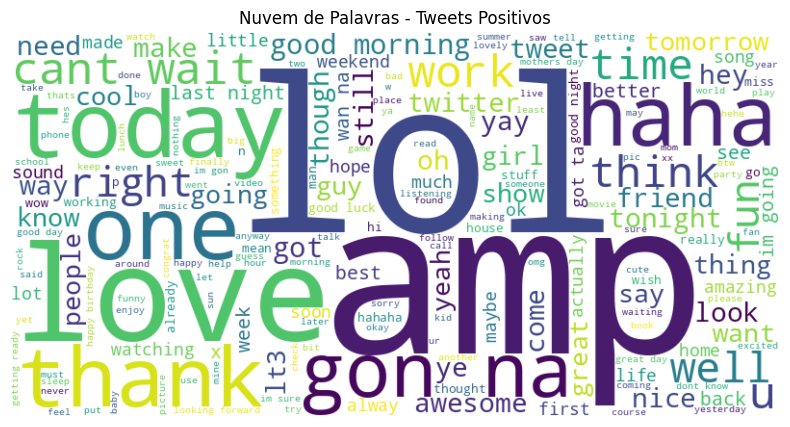

In [ ]:
# nuvem positiva
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Tweets Positivos')
plt.show()

### Nuevm Negativa

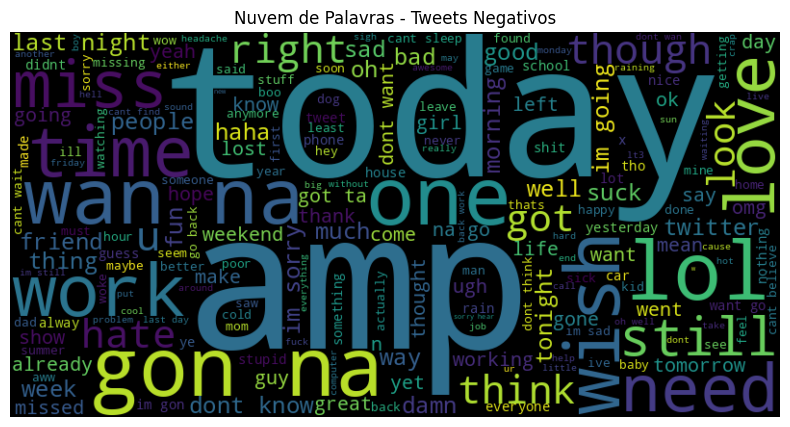

In [ ]:
# nuvem negativa
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Tweets Negativos')
plt.show()

# Estatística Descritiva

Como visto nos plots anteriores, adicionamos uma coluna para a largura dos tweets, o que parece ter algum impacto em suas reações.

Para verificar se a largura dos tweets influencia em seus sentimentos, conduziremos um teste de hipotese, onde:
- $H_0 : $ $μ_{positivos}=μ_{negativos}$, O comprimento dos tweets não está relacionado ao sentimento.
- $H_1 : $ $μ_{positivos}
!= μ_{negativos}$, O comprimento dos tweets está relacionado ao sentimento.

Primeiro verificamos a diferença entre a variancia na largura dos tweets positivos e dos negativos.

Em seguida performamos o teste $T$, pois estamos calculando a diferença entre a média de dois grupos, para saber se rejeitamos ou aceitamos a hipótese nula.

Para adicionar:
- Mostrar a importancia da variancia para entender o comportamento dos dados
- Mostrar como montar o grafico de largura por quantidade de tweets
- Mostrar como esse grafico se comporta em relação a um gráfico normal
- Ensinar o que é a zona crítica
- Mostrar como fica quando o valor T está na zona critica

In [ ]:
from scipy import stats

# Separar os dados em dois grupos: tweets positivos e negativos
positive_tweets = df[df['target'] == 4]['tweet_length'].values
negative_tweets = df[df['target'] == 0]['tweet_length'].values

# Teste de Levene
stat_levene, p_levene = stats.levene(positive_tweets, negative_tweets)
print(f"Levene's test p-value: {p_levene}")

# Interpretar os resultados
alpha = 0.05
if p_levene < alpha:
    print("Levene's test: As variâncias são significativamente diferentes.")
    t_stat, p_value = stats.ttest_ind(positive_tweets, negative_tweets, equal_var=False)
else:
    print("Levene's test: Não há evidências suficientes para afirmar que as variâncias são diferentes.")
    t_stat, p_value = stats.ttest_ind(positive_tweets, negative_tweets, equal_var=True)

if p_value < alpha:
    print("Rejeitamos a hipótese nula. O comprimento dos tweets está associado ao sentimento.")
else:
    print("Não rejeitamos a hipótese nula. O comprimento dos tweets não está significativamente associado ao sentimento.")

Levene's test p-value: 1.3348733049392609e-48
Levene's test: As variâncias são significativamente diferentes.
Rejeitamos a hipótese nula. O comprimento dos tweets está associado ao sentimento.


# Modelagem

Para adicionar:
- Explicar a importancia de TF-IDF, como ele faz a consideração de palavras importantes a as converte para 0 ou 1
- Como a matriz esparsa ajuda na economia de memoria
- Formula TF-IDF para matrix esparsa


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Transformar os textos em vetores TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_text'])

# As linhas abaixo estão comentada pois para performar com esta coluna adicional
# teve um aumento muito significante no custo de processamento e pouco retorno

# adicionar a coluna 'tweet_length' como matriz esparsa
# scaler = StandardScaler()
# tweet_length = scaler.fit_transform(df['tweet_length'].values.reshape(-1, 1))
# X = hstack([text_tfidf, tweet_length])

# O alvo é a coluna 'target'
y = df['target']

# Binarização das saidas
y_binary = label_binarize(y, classes=[0, 4]).reshape(-1)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

# Definir os hiperparâmetros a serem testados para cada modelo
param_grids = {
    "Naive Bayes": {
        'alpha': [0.5, 1.0, 1.5]
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1],
        'solver': ['sag', 'newton-cg'],
        'penalty': ['l2']
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

# Definir os modelos
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=400),
    "Neural Network": MLPClassifier(max_iter=100, early_stopping=True)
}

melhores_estimadores = {}

# Treinamento e avaliação de cada modelo
for model_name, model in models.items():
    print(f"Treinando o modelo: {model_name}")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Acurácia do modelo {model_name}: {accuracy}")

    melhores_estimadores[model_name] = model

Tamanho do conjunto de treino: (1279999, 1000)
Tamanho do conjunto de teste: (320000, 1000)
Treinando o modelo: Naive Bayes
Acurácia do modelo Naive Bayes: 0.732640625
Treinando o modelo: Logistic Regression
Acurácia do modelo Logistic Regression: 0.74826875
Treinando o modelo: Neural Network
Acurácia do modelo Neural Network: 0.759175


## Validação Cruzada e Hiperparâmetros

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(models['Logistic Regression'], param_grids['Logistic Regression'], cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros para Regressão Logistica: {grid_search.best_params_}")

melhor_modelo = grid_search.best_estimator_

Melhores Hiperparâmetros para Regressão Logistica: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


## Avaliação do modelo

Métricas por matrix de confusão:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = melhor_modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Regressão Logistica:")
print(f"Acurácia: {accuracy:.4f}, Precisão: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")
print("Relatório de Classificação:\n", report)

Regressão Logistica:
Acurácia: 0.7483, Precisão: 0.7491, Recall: 0.7483, F1-Score: 0.7480

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74    159494
           1       0.73      0.78      0.76    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



# Plotando a Matrix de Confusão e Curva ROC

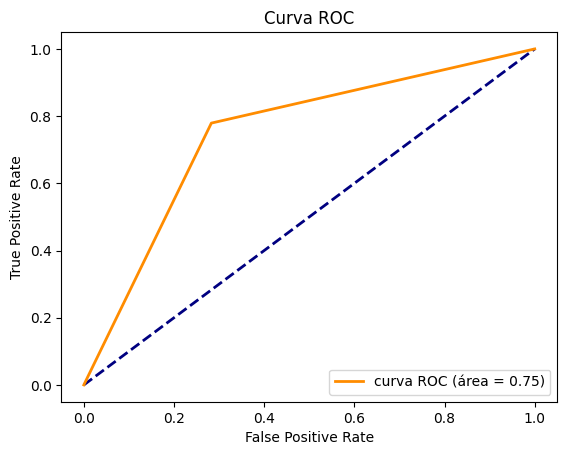

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# armazena os valores de metricas retornados pela função.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# armazena a área sob curva
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC (área = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Matriz de Confusão

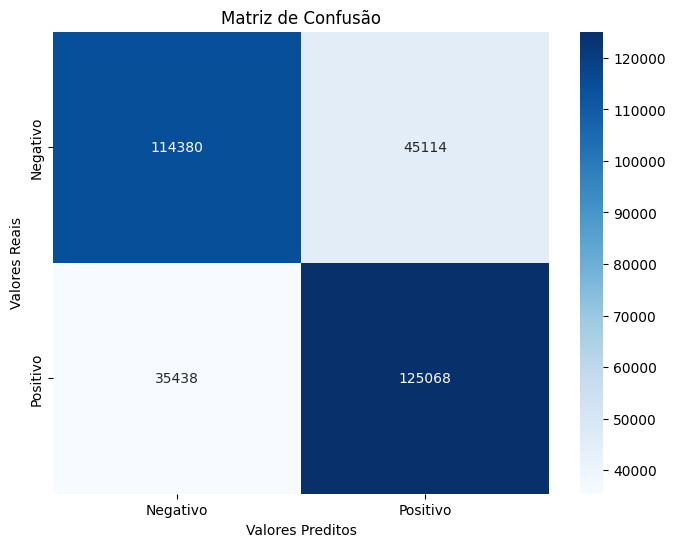

In [ ]:
from sklearn.metrics import confusion_matrix

# puxando os dados de tp, tn, fp e fn
cm = confusion_matrix(y_test, y_pred)

# plotando a matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# Exportando o modelo

Usando a biblioteca **joblib**, é possivel fazer o export de modelos que realizam o treinamento com grandes arrays de forma simples.

In [ ]:
import joblib

model = melhor_modelo

# salvar o modelo em um arquivo .pkl
joblib.dump(model, 'modelo.pkl')

joblib.dump(tfidf, 'vetor_tfidf.pkl')

# e para ara carregar o modelo novamente
model_carregado = joblib.load('modelo.pkl')


- **Sobre arquivos `.pkl`:** O .pkl é a extensão de arquivo associada ao formato de serialização pickle no Python. O pickle é um módulo do Python que permite serializar (converter) objetos Python em uma sequência de bytes que pode ser armazenada em um arquivo. Esse arquivo pode então ser carregado posteriormente, recriando o objeto original.